In [1]:
import torch
from dpp_nets.my_torch.simulator2 import SimulRegressor
from dpp_nets.helper.plotting import plot_floats, plot_dict

In [2]:
# Global Settings
input_set_size = 50
n_clusters = 20
dtype = torch.DoubleTensor
path = '/Users/Max/Desktop/master thesis/latex/figures/plots'

In [9]:
# Deterministic Network To see how difficult it is
torch.manual_seed(0)
deterministic = SimulRegressor(input_set_size, n_clusters, dtype)
deterministic.train_deterministic(1000, 10, lr=1e-3)
deterministic.train_deterministic(1000, 100, lr=1e-5)
deterministic.sample_deterministic()

33.61708061307238
35.90718515581295
32.81878125023826
31.707427090770057
18.78841866111685
25.706732095086238
27.630969684760725
17.381803241929436
28.000409399340263
28.433861274012475
27.234978447207276
19.82110360750284
15.610748853796855
21.285876167696994
17.198237342093115
27.947943386787937
11.765769006140847
38.84896611272661
27.084085399623444
30.940357443248352
52.14937412962687
27.342086536050537
10.341713154436441
27.520984967982667
15.689546548081239
15.991641065076468
19.085080353263745
24.36309940465346
33.6529076210238
43.29824567013043
28.104553000636628
15.301392189968757
14.638603099241019
17.355229816105247
21.841589723604073
36.29489305165943
14.255111155951813
31.83000765096988
20.590249956815335
13.991943658010772
20.500582831673917
41.58988417998974
18.294746562683915
19.49032261870317
15.46512265571952
9.075121293001457
12.862978351601129
35.6353856994502
25.741936292756208
13.015156463007756
21.320585505594643
14.47589264148009
19.38693692924607
23.35817668964

In [4]:
#### For the purpose of demonstrating the regularization, we will regularise the models to 
#### return sets of 20, 15, 10, 5, 20 should be able to become a perfect predictor
#### hence train it first to find sensible settings, then find
#### we evaluate all models on random set size, sets of size 20, sets of size 15, sets of 
#### size 10 and sets of size 5

# Baseline20 
torch.manual_seed(0)
baseline20 = SimulRegressor(input_set_size, n_clusters, dtype)

# be very radical with enforcing the regularization mean
baseline20.train(500, 25, 5, baseline=True, lr=1e-3, reg=100, reg_mean=20)
baseline20.train(500, 25, 5, baseline=True, lr=1e-4, reg=100, reg_mean=20)
baseline20.train(500, 50, 5, baseline=True, lr=1e-5, reg=100, reg_mean=20)

19.839701009234965


In [6]:
#baseline20.train(1000,25, 5, baseline=True, lr=1e-3, reg=100, reg_mean=20)
baseline20.evaluate(1000)

13.510164944308904
3.9888295340516176
2.3170818968820464
3.9881910197218953
3.4270027936141765
1.6683213779989443
2.175104148054119
2.26278540254082
3.5475892054381526
1.940764514219625
2.878468670582894 0.5174283208020061 0.9950810862039581 20.024


(2.878468670582894, 0.5174283208020061, 0.9950810862039581, 20.024)

In [43]:
# Baseline15
torch.manual_seed(0)
baseline15 = SimulRegressor(input_set_size, n_clusters, dtype)

# be very radical with enforcing the regularization mean
baseline15.train(500, 25, 5, baseline=True, lr=1e-3, reg=100, reg_mean=15)
baseline15.train(500, 25, 5, baseline=True, lr=1e-4, reg=100, reg_mean=15)
baseline15.train(500, 50, 5, baseline=True, lr=1e-5, reg=100, reg_mean=15)

36.75004976284212
16.831089866770963
9.319252719159183
4.9643296332750335
7.9929389881246085
2.3214722400929193
3.843576582990738
3.3439792561680397
3.8525916705006624
2.4029133929885274
2.7680243189915603
2.407817446559806
2.2788775000316366
3.277836445319513
2.334154607852371


In [44]:
# Baseline10
torch.manual_seed(0)
baseline10 = SimulRegressor(input_set_size, n_clusters, dtype)

# be very radical with enforcing the regularization mean
baseline10.train(500, 25, 5, baseline=True, lr=1e-3, reg=100, reg_mean=10)
baseline10.train(500, 25, 5, baseline=True, lr=1e-4, reg=100, reg_mean=10)
baseline10.train(500, 50, 5, baseline=True, lr=1e-5, reg=100, reg_mean=10)

27.22671399586989
33.371237497436404
14.348020881023182
18.23775005134214
15.564636790578703
9.302572870485616
5.718548342710287
6.174169250597637
10.20063213778146
6.077978463489943
7.716928648758271
5.26294620013078
5.544759444632172
6.449175270818957
8.123469012806337


In [72]:
## Holds all the data
# We have 4 models, reg 5, 10, 15, 20
# each of the four models gets evaluated, on 5, 10, 15, 20, and all sets. 

model_no = 3
eval_no = 5
super_loss = [[None for j in range(eval_no)] for i in range(model_no)]
super_prec = [[None for j in range(eval_no)] for i in range(model_no)]
super_rec = [[None for j in range(eval_no)] for i in range(model_no)]
super_size = [[None for j in range(eval_no)] for i in range(model_no)]

evals = [None, 5, 10, 15, 20]

In [73]:
# Evaluate baseline 10 model
i = 0 
for ix, e in enumerate(evals):
    loss, prec, rec, size = baseline10.evaluate_fixed(1000, e)
    super_loss[i][ix] = loss
    super_prec[i][ix] = prec
    super_rec[i][ix] = rec
    super_size[i][ix] = size

# Evaluate baseline15 model
i += 1
for ix, e in enumerate(evals):
    loss, prec, rec, size = baseline15.evaluate_fixed(1000, e)
    super_loss[i][ix] = loss
    super_prec[i][ix] = prec
    super_rec[i][ix] = rec
    super_size[i][ix] = size

# Evaluate baseline20 model
i +=1
for ix, e in enumerate(evals):
    loss, prec, rec, size = baseline20.evaluate_fixed(1000, e)
    super_loss[i][ix] = loss
    super_prec[i][ix] = prec
    super_rec[i][ix] = rec
    super_size[i][ix] = size

6.926379764063091 0.7270902819402818 0.7707926510108393 10.005
3.87324127411406 0.4984474275724247 0.982999999999998 9.951
8.178624137853168 0.827522630147632 0.821799999999991 10.003
5.716913439161798 0.9300413364413354 0.6180000000000073 10.007
20.627833726869223 0.9582648129648105 0.4762999999999964 9.977
2.5681902245015413 0.6311181210945904 0.945384316388806 15.014
1.1093281638423078 0.33452257864684165 0.9997999999999999 14.956
3.1940874655193676 0.6620438186813167 0.9923999999999988 14.997
2.6117008538431197 0.931560644257692 0.9346666666666551 15.053
9.155778195430962 0.9879333333333306 0.7436500000000009 15.057
0.8941971913953438 0.5437331244778613 0.9948419929700504 19.988
0.7462410656432855 0.2500822055137846 0.9997999999999999 19.993
1.4267825183754341 0.4982506265664161 0.9969999999999994 20.013
1.1681137177501604 0.7436647869674191 0.9917333333333309 20.006
0.4111907713233611 0.9823320004556895 0.9837500000000047 20.031


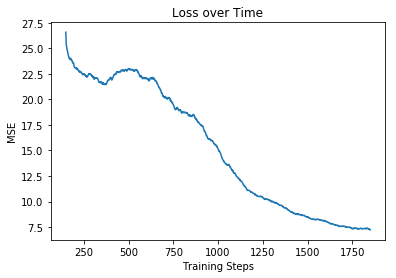

In [15]:
fname = None # 
title = 'Loss over Time'
xlabel = 'Training Steps'
ylabel = 'MSE'

plot_floats(deterministic.loss_dict, 300, fname, title, xlabel, ylabel)

In [ ]:
### Now the Big Evaluation of the 4 models to see how it looks.

# Training Settings for Comparison Purposes
train_steps = 1000
batch_size = 100
lr = 1e-5
reg=0.1
reg_mean = 10
sample_iter = 5

# Pure Reinforce
torch.manual_seed(0)
pure_reinforce = SimulRegressor(input_set_size, n_clusters, dtype)
print(pure_reinforce.signal_clusters)
pure_reinforce.evaluate(1000)
pure_reinforce.train(train_steps, batch_size, 1, baseline=False, lr=lr, reg=reg, reg_mean=reg_mean)

pure_reinforce.evaluate(1000)
plot_floats(pure_reinforce.loss_dict, 100, fname, title, xlabel, ylabel)

In [ ]:
# Reinforce Cheat
torch.manual_seed(0)
reinforce = SimulRegressor(input_set_size, n_clusters, dtype)
pure_reinforce.evaluate(1000)
reinforce.train(train_steps, batch_size, 1, baseline=False, lr=lr*sample_iter, reg=reg, reg_mean=reg_mean)

reinforce.evaluate(1000)
plot_floats(reinforce.loss_dict, 100, fname, title, xlabel, ylabel)

In [ ]:
# Multi-Sample
torch.manual_seed(0)
multi_sample = SimulRegressor(input_set_size, n_clusters, dtype)
multi_sample.evaluate(1000)
multi_sample.train(train_steps, batch_size, sample_iter, baseline=False, lr=lr, reg=reg, reg_mean=reg_mean)

multi_sample.evaluate(1000)
plot_floats(multi_sample.loss_dict, 100, fname, title, xlabel, ylabel)

In [ ]:
# Multi-Sample + Baseline
lr = 1e-3
torch.manual_seed(0)
baseline = SimulRegressor(input_set_size, n_clusters, dtype)
baseline.evaluate(1000)
baseline.train(train_steps, batch_size, sample_iter, baseline=True, lr=lr, reg=reg, reg_mean=reg_mean)

baseline.evaluate(1000)
plot_floats(baseline.loss_dict, 100, fname, title, xlabel, ylabel)

In [182]:
import matplotlib.pyplot as plt
import numpy as np

def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

def curate_ax(idx, ax, my_data):
    
    x_c = 1
    x_m = 0.5
    x_positioning = [x_c + x_m*i for i in range(len(my_data))]
    width = 0.3 # width of bars
    colors = ['deepskyblue', 'dodgerblue', 'royalblue']
    labels = ['label0','label1','label2','label3','label4','label5']
    
    rects = []
    for i, data in enumerate(my_data):
        r = ax.bar(x_positioning[i], data[idx], width, color=colors[i], label=labels[i])
        rects.append(r)
        # autolabel(r, ax)
    return rects

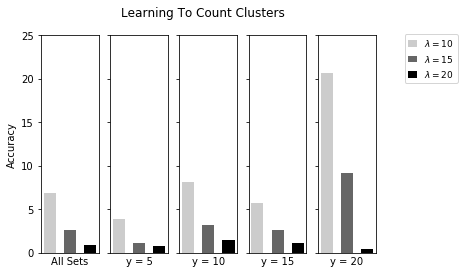

In [174]:
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, sharey=True)

# Create subplots subplot
rects0 = curate_ax(0, ax0, super_loss)
curate_ax(1, ax1, super_loss)
curate_ax(2, ax2, super_loss)
curate_ax(3, ax3, super_loss)
curate_ax(4, ax4, super_loss)


# Axis and Title Settings
head = plt.suptitle('Learning To Count Clusters')

# y-axis 
ax0.set_yticks([0,5,10,15,20,25])
ax0.set_ylim([0,25])
ax0.set_ylabel('Accuracy')

# x-axis
ax0.set_xticks([],[])
ax1.set_xticks([],[])
ax2.set_xticks([],[])
ax3.set_xticks([],[])
ax4.set_xticks([],[])
#ax5.set_xticks([],[])

ax0.set_xlabel('All Sets')
ax1.set_xlabel('y = 5')
ax2.set_xlabel('y = 10')
ax3.set_xlabel('y = 15')
ax4.set_xlabel('y = 20')
#ax0.set_title('y = 5')

# Legend
# Legend
lgd = plt.legend((rects0[0], rects0[1], rects0[2]), 
           (r'$\lambda = 10$', r'$\lambda = 15$', r'$\lambda = 20$'), 
           loc = 'best', bbox_to_anchor = (0,-0.1,1.1,1),
                 fontsize=9, numpoints=3, handlelength=1,
           bbox_transform = plt.gcf().transFigure)
plt.savefig('odl.pdf', bbox_extra_artists=(lgd,head), bbox_inches='tight')
plt.show()

In [99]:
super_loss

[[6.926379764063091,
  3.87324127411406,
  8.178624137853168,
  5.716913439161798,
  20.627833726869223],
 [2.5681902245015413,
  1.1093281638423078,
  3.1940874655193676,
  2.6117008538431197,
  9.155778195430962],
 [0.8941971913953438,
  0.7462410656432855,
  1.4267825183754341,
  1.1681137177501604,
  0.4111907713233611]]

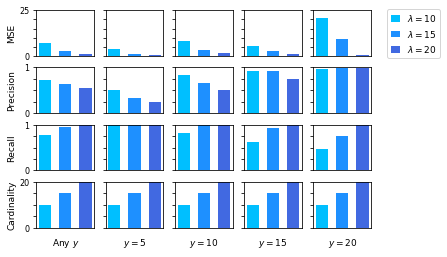

In [192]:
f, axarr = plt.subplots(4, 5, sharey='row', sharex='col')

ax0 = axarr[0,0]
ax1 = axarr[0,1]
ax2 = axarr[0,2]
ax3 = axarr[0,3]
ax4 = axarr[0,4]

ax5 = axarr[1,0]
ax6 = axarr[1,1]
ax7 = axarr[1,2]
ax8 = axarr[1,3]
ax9 = axarr[1,4]

ax10 = axarr[2,0]
ax11 = axarr[2,1]
ax12 = axarr[2,2]
ax13 = axarr[2,3]
ax14 = axarr[2,4]

ax15 = axarr[3,0]
ax16 = axarr[3,1]
ax17 = axarr[3,2]
ax18 = axarr[3,3]
ax19 = axarr[3,4]

# Create subplots subplot
rects0 = curate_ax(0, ax0, super_loss)
curate_ax(1, ax1, super_loss)
curate_ax(2, ax2, super_loss)
curate_ax(3, ax3, super_loss)
curate_ax(4, ax4, super_loss)

curate_ax(0, ax5, super_prec)
curate_ax(1, ax6, super_prec)
curate_ax(2, ax7, super_prec)
curate_ax(3, ax8, super_prec)
curate_ax(4, ax9, super_prec)

curate_ax(0, ax10, super_rec)
curate_ax(1, ax11, super_rec)
curate_ax(2, ax12, super_rec)
curate_ax(3, ax13, super_rec)
curate_ax(4, ax14, super_rec)

curate_ax(0, ax15, super_size)
curate_ax(1, ax16, super_size)
curate_ax(2, ax17, super_size)
curate_ax(3, ax18, super_size)
curate_ax(4, ax19, super_size)

# Axis and Title Settings
#head = plt.suptitle('Learning To Count Clusters')

# y-axis 
ax0.set_yticks([0,5,10,15,20,25])
ax0.set_yticklabels(['0','','','','','25'],size=8)
ax0.set_ylim([0,25])
ax0.set_ylabel('MSE', size=9)
ax0.get_yaxis().set_label_coords(-0.35,0.5)

ax5.set_yticks([0,0.25,0.5,0.75,1])
ax5.set_yticklabels(['0','','','','1'],size=8)
ax5.set_ylim([0,1])
ax5.set_ylabel('Precision', size=9)
ax5.get_yaxis().set_label_coords(-0.35,0.5)


ax10.set_yticks([0,0.25,0.5,0.75,1])
ax10.set_yticklabels(['0','','','','1'],size=8)
ax10.set_ylim([0,1])
ax10.set_ylabel('Recall', size=9)
ax10.get_yaxis().set_label_coords(-0.35,0.5)


ax15.set_yticks([0,5,10,15,20])
ax15.set_yticklabels(['0','','','','20'],size=8)
ax15.set_ylim([0,20])
ax15.set_ylabel('Cardinality', size=9)
ax15.get_yaxis().set_label_coords(-0.35,0.5)

# x-axis
ax0.set_xticks([],[])
ax1.set_xticks([],[])
ax2.set_xticks([],[])
ax3.set_xticks([],[])
ax4.set_xticks([],[])
#ax5.set_xticks([],[])

ax15.set_xlabel('Any $y$',size=9)
ax15.get_xaxis().set_label_coords(0.5,-0.2)
ax16.set_xlabel(r'$y = 5$', size=9)
ax16.get_xaxis().set_label_coords(0.5,-0.2)

ax17.set_xlabel(r'$y = 10$', size=9)
ax17.get_xaxis().set_label_coords(0.5,-0.2)

ax18.set_xlabel(r'$y = 15$', size=9)
ax18.get_xaxis().set_label_coords(0.5,-0.2)

ax19.set_xlabel(r'$y = 20$', size=9)
ax19.get_xaxis().set_label_coords(0.5,-0.2)


# Legend
lgd = plt.legend((rects0[0], rects0[1], rects0[2]), 
           (r'$\lambda = 10$', r'$\lambda = 15$', r'$\lambda = 20$'), 
           loc = 'best', bbox_to_anchor = (0,-0.1,1.07,1),
                 fontsize=9,handlelength =1,
           bbox_transform = plt.gcf().transFigure)

f.subplots_adjust(hspace=0.25)

plt.savefig('no_header.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [185]:
super_loss

[[6.926379764063091,
  3.87324127411406,
  8.178624137853168,
  5.716913439161798,
  20.627833726869223],
 [2.5681902245015413,
  1.1093281638423078,
  3.1940874655193676,
  2.6117008538431197,
  9.155778195430962],
 [0.8941971913953438,
  0.7462410656432855,
  1.4267825183754341,
  1.1681137177501604,
  0.4111907713233611]]

In [186]:
import pickle

with open('super_loss.pkl', 'wb') as f:
    pickle.dump(super_loss, f)

In [187]:
with open('super_prec.pkl', 'wb') as f:
    pickle.dump(super_prec, f)

In [188]:
with open('super_rec.pkl', 'wb') as f:
    pickle.dump(super_rec, f)

In [189]:
with open('super_size.pkl', 'wb') as f:
    pickle.dump(super_size, f)